In [18]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

%matplotlib inline

In [19]:
# Data
m = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Music_data.csv")

m.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Jonas Brothers,0.594,0.464,0,-7.898,1,0.0340,0.306000,0.000000,0.1870,0.545,193866,Please Be Mine
1,2,Jonas Brothers,0.582,0.697,7,-3.842,1,0.0695,0.000745,0.000000,0.1850,0.701,153346,S.O.S.
2,3,Jonas Brothers,0.442,0.961,1,-2.914,1,0.0928,0.000035,0.000036,0.0619,0.405,168480,Mandy
3,4,Jonas Brothers,0.659,0.857,11,-5.850,1,0.0437,0.004500,0.000002,0.3350,0.798,201960,Year 3000
4,5,Jonas Brothers,0.468,0.893,11,-3.554,1,0.1300,0.003890,0.000000,0.3670,0.810,164973,Hold On


In [20]:
m.shape

(2553, 14)

# Train Test Split

In [21]:
# Split Data
predictors = ["energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "duration_ms"]

X_train, X_test, y_train, y_test = train_test_split(m[predictors], m["danceability"], test_size=0.2)

In [22]:
X_train.shape

(2042, 10)

In [23]:
X_test.shape

(511, 10)

In [24]:
X_train.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
1239,0.487,1,-14.287,1,0.0519,0.00485,0.134000,0.109,0.405,282440
2187,0.777,9,-2.881,1,0.0324,0.05100,0.000000,0.320,0.428,199200
808,0.567,6,-5.414,1,0.0594,0.61100,0.000000,0.111,0.485,280786
570,0.739,1,-6.124,1,0.2870,0.05770,0.000002,0.904,0.353,123600
1245,0.745,8,-6.044,1,0.3310,0.05940,0.000000,0.341,0.311,192946


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# predictions
y_pred = model.predict(X_test)
y_pred[1:10]

array([0.55845959, 0.6419891 , 0.51444979, 0.72510328, 0.7196842 ,
       0.58987855, 0.76218962, 0.74520706, 0.65371538])

In [27]:
model.score(X_test, y_test) #testing R2

0.31422880551890797

In [28]:
model.score(X_train, y_train) #training R2

0.3718887934179411

In [29]:
true_vs_pred = pd.DataFrame({"predict": y_pred,"trueV": y_test})
true_vs_pred.head()

,predict,trueV
155,0.605682,0.463
240,0.558460,0.538
1223,0.641989,0.677
699,0.514450,0.549
2167,0.725103,0.643


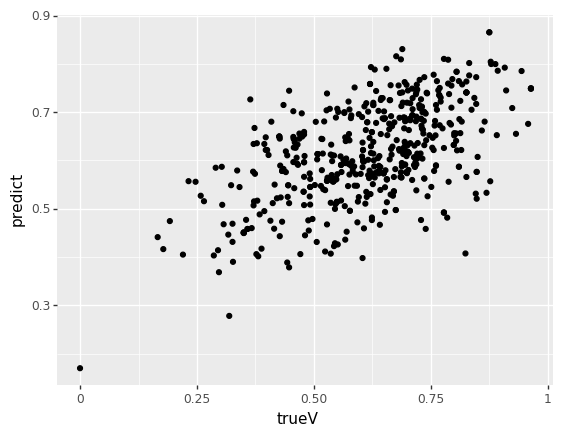

<ggplot: (8788181581879)>

In [30]:
(ggplot(true_vs_pred, aes(x = "trueV", y = "predict")) + geom_point())

# K Fold

In [31]:
kf = KFold(n_splits = 10)

In [37]:
X = m[predictors]
y = m["danceability"]

lr = LinearRegression()
mse = []
r2 = []

In [40]:
for train,test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    # model
    model = lr.fit(X_train, y_train)
    # record accuracy
    mse.append(mean_squared_error(y_test, model.predict(X_test)))
    r2.append(r2_score(y_test,model.predict(X_test)))
    

In [41]:
mse

[0.020930307424301006,
 0.020930307424301006,
 0.020930307424301006,
 0.02398415840437807,
 0.017611888653199907,
 0.014031482385972918,
 0.017964541727112288,
 0.021283298516371393,
 0.021093072207528905,
 0.007635165315696738,
 0.011737773142066496,
 0.011999264910150312]

In [42]:
np.mean(mse)

0.01751096396128167

In [43]:
r2

[-0.0026500320428106683,
 0.32289285991515637,
 0.39466086950544466,
 0.28631073738917756,
 0.2666614669225986,
 -0.01931044142466032,
 0.21743248871668797,
 0.26684400339532266,
 0.15093339176307585,
 0.1458587900640479]

In [44]:
np.mean(r2)

0.20296341342040405

# Leave One Out

In [45]:
loo = LeaveOneOut()

mse = []

In [47]:
for train,test in loo.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    # model
    model = lr.fit(X_train, y_train)
    # record accuracy
    mse.append(mean_squared_error(y_test, model.predict(X_test)))

In [50]:
np.mean(mse)

0.01576766520032189

# Quick Note about Data Leakage...

In [52]:
# Say you want to standardize...
# Split Data
predictors = ["energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "duration_ms"]

X_train, X_test, y_train, y_test = train_test_split(m[predictors], m["danceability"], test_size=0.2)

X_train.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
1536,0.519,5,-7.060,0,0.0762,0.16200,0.000000,0.0748,0.376,289973
669,0.518,6,-6.126,1,0.0313,0.10700,0.000000,0.3540,0.427,249146
1096,0.836,5,-4.619,1,0.0283,0.00388,0.000000,0.1600,0.553,220160
1777,0.526,7,-8.349,1,0.0263,0.19900,0.000004,0.1400,0.323,239426
201,0.272,7,-12.194,1,0.0342,0.69900,0.000274,0.0758,0.388,154520


In [53]:
zscore = StandardScaler()

In [54]:
zscore.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
Xz_train = zscore.transform(X_train)

In [56]:
Xz_test = zscore.transform(X_test) # DO NOT REFIT, I REPEAT DO NOT REFIT